In [1]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm

In [2]:
with open("hopen.csv", encoding="utf-8-sig") as file:
    reader = csv.DictReader(file, delimiter=";")
    df = [
        (
            int(r["Tid(norsk normaltid)"]),
            float(r["Middeltemperatur (år)"].replace(",", "."))
        )
        for r in reader
    ]

years, temps = map(list, zip(*df))

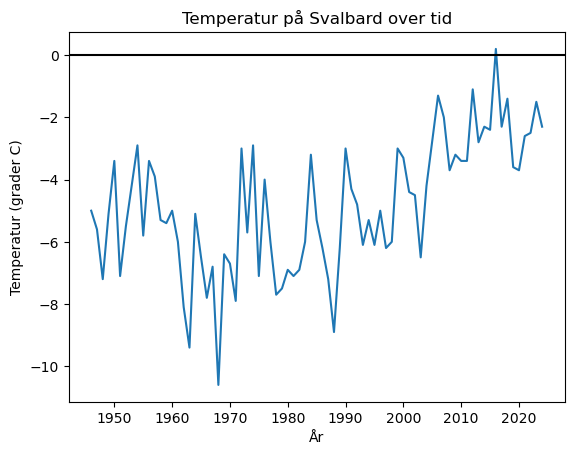

In [6]:
plt.plot(*zip(*df))
plt.xlabel("År")
plt.ylabel("Temperatur (grader C)")
plt.title("Temperatur på Svalbard over tid")
plt.axhline(color="black")

In [14]:
k = 7
smoothed = []
for i in range(k, len(temps) - k):
    smoothed.append(np.mean(temps[(i-k):(i+k)]))

lowess_smoothed = sm.nonparametric.lowess(temps, years, frac=0.2, return_sorted=False)

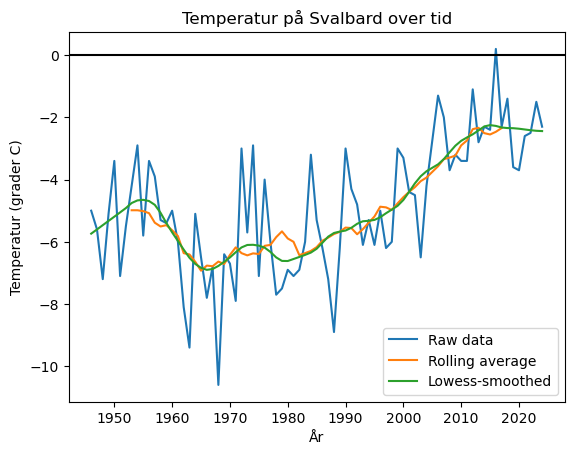

In [18]:
plt.plot(years, temps, label="Raw data")
plt.plot(years[k:len(temps)-k], smoothed, label="Rolling average")
plt.plot(years, lowess_smoothed, label="Lowess-smoothed")
plt.xlabel("År")
plt.ylabel("Temperatur (grader C)")
plt.title("Temperatur på Svalbard over tid")
plt.axhline(color="black")
plt.legend()

In [19]:
def model_linear(t, a, b):
    return a + b * t

def model_exp(t, a, b):
    return a * b ** t

def model_polynomial(t, a, b, c):
    return a * t + b * t ** 2 + c * t ** 3

In [20]:
coeffs_linear, _ = curve_fit(model_linear, years, temps)
coeffs_exp, _ = curve_fit(model_exp, years, temps)
coeffs_polynomial, _ = curve_fit(model_polynomial, years, temps)

In [10]:
xs_model = np.linspace(min(years), max(years), 1000)
ys_linear = model_linear(xs_model, *coeffs_linear)
ys_exp = model_exp(xs_model, *coeffs_exp)
ys_polynomial = model_polynomial(xs_model, *coeffs_polynomial)

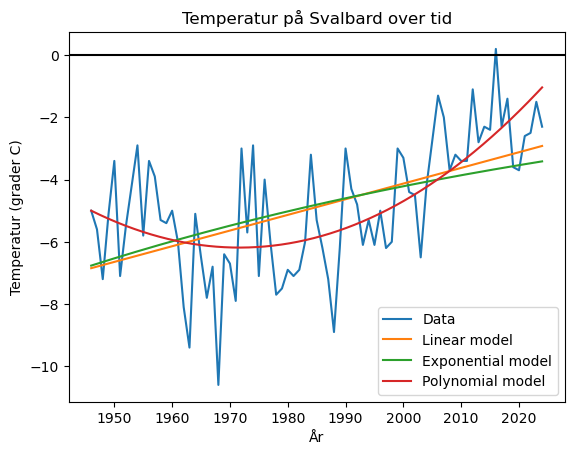

In [21]:
plt.plot(years, temps, label="Data")
plt.plot(xs_model, ys_linear, label="Linear model")
plt.plot(xs_model, ys_exp, label="Exponential model")
plt.plot(xs_model, ys_polynomial, label="Polynomial model")
plt.xlabel("År")
plt.ylabel("Temperatur (grader C)")
plt.title("Temperatur på Svalbard over tid")
plt.axhline(color="black")

plt.legend()